In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version
# Check python
!which python

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

/mnt/nvme0n1/miniconda3/envs/hieu/bin/python


In [2]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [3]:
from mmcv import collect_env
collect_env()

/mnt/nvme0n1/miniconda3/envs/hieu/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'sys.platform': 'linux',
 'Python': '3.7.11 (default, Jul 27 2021, 14:32:16) [GCC 7.5.0]',
 'CUDA available': True,
 'GPU 0': 'NVIDIA GeForce RTX 3060 Ti',
 'GPU 1': 'NVIDIA GeForce GTX 1650',
 'CUDA_HOME': '/usr/local/cuda-11.1',
 'NVCC': 'Build cuda_11.1.TC455_06.29190527_0',
 'GCC': 'gcc (Ubuntu 9.4.0-1ubuntu1~20.04) 9.4.0',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code

In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMRotate installation
import mmrotate
print(mmrotate.__version__)

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
0.1.1
2.22.0
11.1
GCC 7.3


In [5]:
import time
import mmcv
import matplotlib.pyplot as plt

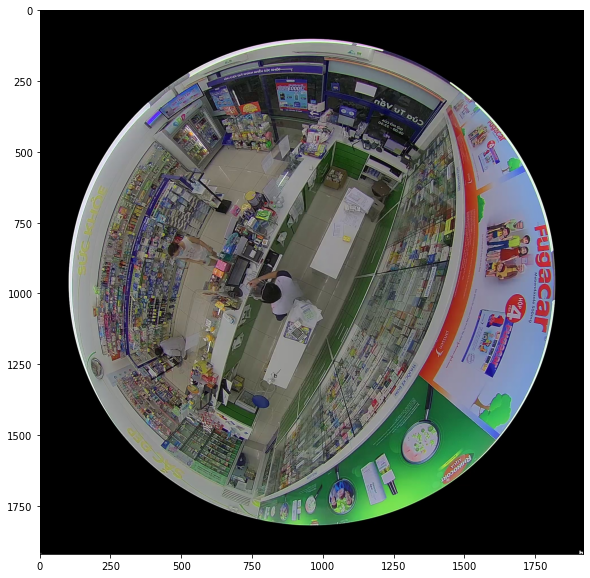

In [6]:
# Let's take a look at the dataset image
img = mmcv.imread('../../../data/PhamacityDota/images/linhdam2_10.png')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [8]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# # Choose to use a config and initialize the detector
# config = '../configs/rotated_retinanet/rotated_retinanet_obb_r50_fpn_1x_dota_ms_rr_le90.py'

# # Setup a checkpoint file to load
# checkpoint = 'weights/rotated_retina.pth'

# Choose to use a config and initialize the detector
config = '../configs/roi_trans/roi_trans_r50_fpn_1x_dota_ms_rr_le90.py'

# Setup a checkpoint file to load
checkpoint = 'weights/roi_trans.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

/mnt/nvme0n1/miniconda3/envs/hieu/lib/python3.7/site-packages/mmdet/models/dense_heads/anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '


load checkpoint from local path: weights/roi_trans.pth


RoITransformer(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
    

/mnt/nvme0n1/miniconda3/envs/hieu/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/mnt/nvme0n1/miniconda3/envs/hieu/lib/python3.7/site-packages/mmdet/models/dense_heads/anchor_head.py:123: UserWarning: DeprecationWarning: anchor_generator is deprecated, please use "prior_generator" instead
  warnings.warn('DeprecationWarning: anchor_generator is deprecated, '


640.5293579101562


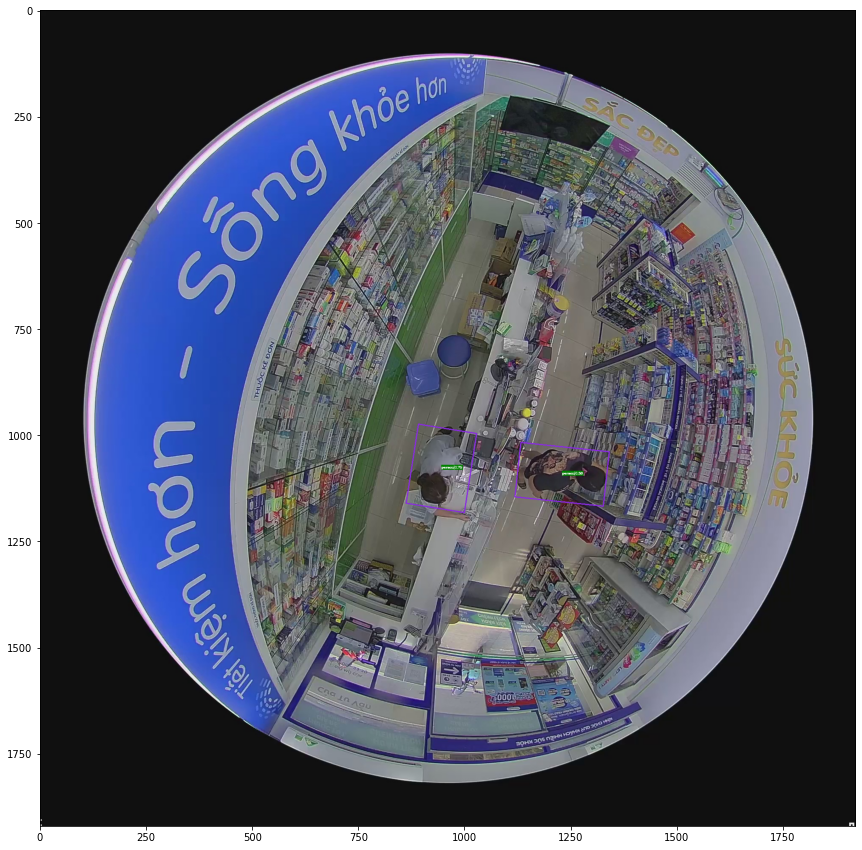

In [9]:
img = mmcv.imread('../../../data/PhamacityDota/images/lyquocsu_26210.png')
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()

result = inference_detector(model, img)

end.record()

# Waits for everything to finish running
torch.cuda.synchronize()

print(start.elapsed_time(end))
model.show_result(img, result, score_thr=0.3, out_file='./output/output.png')
img = mmcv.imread('./output/output.png')
plt.figure(figsize=(20, 15))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

144.36441040039062


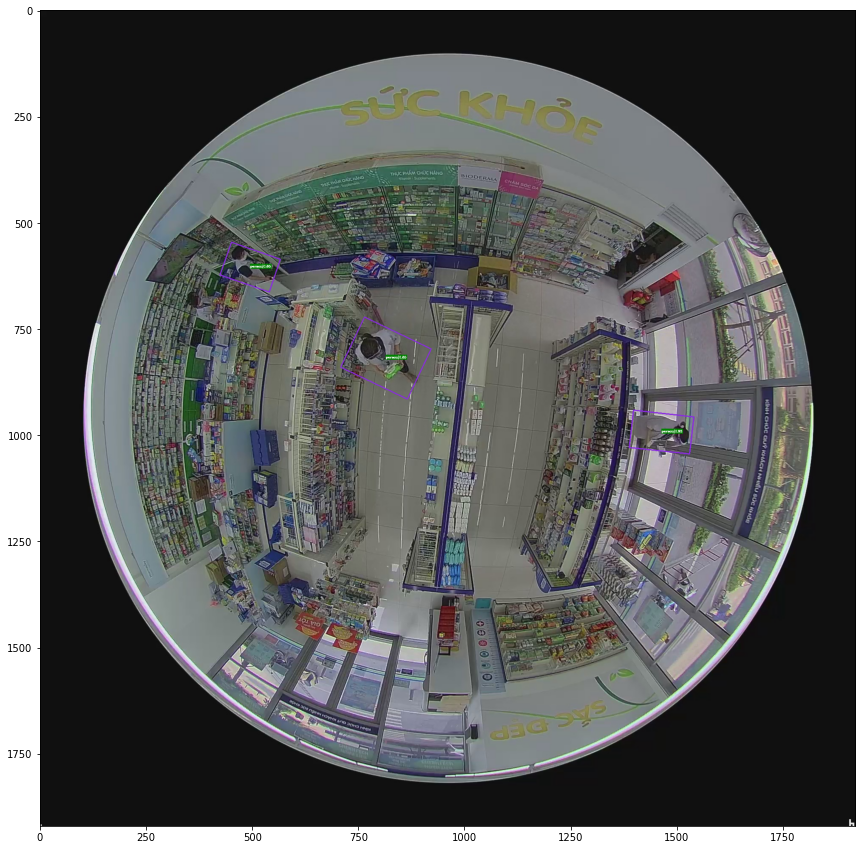

In [12]:
img = mmcv.imread('../../../data/PhamacityDota/images/timecity1_4540.png')

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()

result = inference_detector(model, img)

end.record()

# Waits for everything to finish running
torch.cuda.synchronize()

print(start.elapsed_time(end))
model.show_result(img, result, score_thr=0.3, out_file='./output/output.png')
img = mmcv.imread('./output/output.png')
plt.figure(figsize=(20, 15))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [10]:
def measure_inference_speed(model, path):
# the first several iterations may be very slow so skip them
    num_warmup = 5
    pure_inf_time = 0
    fps = 0
    max_iter = 100
    log_interval = 10

    # benchmark with 2000 image and take the average
    for i, filename in enumerate(os.listdir(path)):
        if filename.endswith(".png"):

            img = mmcv.imread(path + filename)

            torch.cuda.synchronize()
            start_time = time.perf_counter()

            result = inference_detector(model, img)

            torch.cuda.synchronize()
            elapsed = time.perf_counter() - start_time

            model.show_result(img, result, score_thr=0.3, out_file='./output/'+filename)

            if i >= num_warmup:
                pure_inf_time += elapsed
                if (i + 1) % log_interval == 0:
                    fps = (i + 1 - num_warmup) / pure_inf_time
                    print(
                        f'Done image [{i + 1:<3}/ {max_iter}], '
                        f'fps: {fps:.1f} img / s, '
                        f'times per image: {1000 / fps:.1f} ms / img',
                        flush=True)

            if (i + 1) == max_iter:
                fps = (i + 1 - num_warmup) / pure_inf_time
                print(
                    f'Overall fps: {fps:.1f} img / s, '
                    f'times per image: {1000 / fps:.1f} ms / img',
                    flush=True)
                break
    return fps

In [11]:
measure_inference_speed(model, "../../../data/PhamacityDota/images/")

Done image [10 / 100], fps: 6.6 img / s, times per image: 152.4 ms / img
Done image [20 / 100], fps: 5.0 img / s, times per image: 201.6 ms / img
Done image [30 / 100], fps: 5.2 img / s, times per image: 193.9 ms / img
Done image [40 / 100], fps: 5.2 img / s, times per image: 192.8 ms / img
Done image [50 / 100], fps: 5.2 img / s, times per image: 193.7 ms / img
Done image [60 / 100], fps: 5.2 img / s, times per image: 191.6 ms / img
Done image [70 / 100], fps: 5.2 img / s, times per image: 192.1 ms / img
Done image [80 / 100], fps: 5.2 img / s, times per image: 191.6 ms / img
Done image [90 / 100], fps: 5.3 img / s, times per image: 189.5 ms / img
Done image [100/ 100], fps: 5.4 img / s, times per image: 186.8 ms / img
Overall fps: 5.4 img / s, times per image: 186.8 ms / img


5.352129920466534